In [1]:
import geopandas as gpd

In [2]:
hurtos = gpd.read_file('https://www.datos.gov.co/resource/4rxi-8m8d.geojson?$limit=1000000')
hurtos

,municipio,fecha_hecho,cantidad,cod_muni,cod_depto,departamento,geometry
0,RIONEGRO,2024-07-31,7,05615,05,ANTIOQUIA,None
1,SAN PEDRO DE LOS MILAGROS,2024-07-31,1,05664,05,ANTIOQUIA,None
2,MONTEBELLO,2024-07-31,1,05467,05,ANTIOQUIA,None
3,SABANALARGA,2024-07-31,1,08638,08,ATLANTICO,None
4,LURUACO,2024-07-31,2,08421,08,ATLANTICO,None
...,...,...,...,...,...,...,...
588112,FLORIDABLANCA,2003-01-01,1,68276,68,SANTANDER,None
588113,SINCELEJO,2003-01-01,1,70001,70,SUCRE,None
588114,IBAGUE,2003-01-01,6,73001,73,TOLIMA,None
588115,MELGAR,2003-01-01,1,73449,73,TOLIMA,None


In [3]:
hurtos_agrupados = hurtos.groupby("cod_muni")["cantidad"].agg(['sum'])
hurtos_agrupados

,sum
cod_muni,
05001,6166635460677147516935515861687276596954695657...
05002,1111121111211111211111111111111111111111111111...
05004,192
05021,1311111111111111121111111111111111111111211111111
05030,1111111112111111111111121112111112121121111111...
...,...
97666,11111
99001,1121111111111111111111111111111111111111112211...
99524,11111111111111111111111111111111111


In [4]:
hurtos["cantidad"] = hurtos["cantidad"].astype(int)
hurtos_agrupados = hurtos.groupby("cod_muni")["cantidad"].agg(['sum'])
hurtos_agrupados.sort_values(by="sum", ascending = False)

,sum
cod_muni,
11001,1132136
05001,234786
76001,230138
08001,130853
68001,85860
...,...
91405,2
91798,1
85136,1


In [5]:
municipios = gpd.read_file("/content/drive/MyDrive/De cero a Digital Twin en ingeniería civil/Capitulo 5/5.4. Caso de Estudio Hurtos Colombia/COL_Municipio.zip")
municipios

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
2,05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
3,05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((-8352494.010 715689.897, -8352304.86..."
4,05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((-8425665.892 679202.380, -8425597.03..."
...,...,...,...,...,...,...
1117,97889,1108,4.669929e+09,4.292950e+05,97889000,"POLYGON ((-7759205.373 123549.666, -7759311.32..."
1118,99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((-7546884.015 705017.769, -7546632.27..."
1119,99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((-7684507.959 690786.085, -7684118.07..."
1120,99624,4235,3.992354e+09,3.642825e+05,99624000,"POLYGON ((-7866588.235 600460.855, -7866405.66..."


<Axes: >

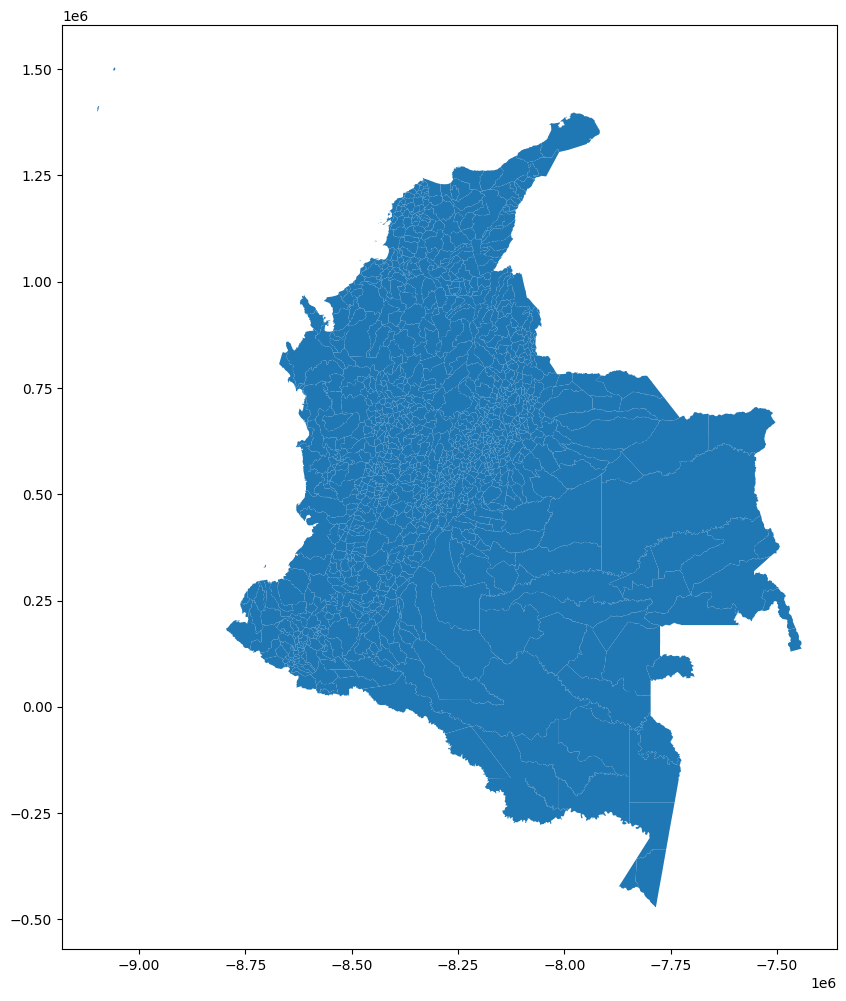

In [6]:
municipios.plot(figsize = (12,12))

In [7]:
municipios.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
municipios_mundial = municipios.to_crs("EPSG:4326")
municipios_mundial.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
datos = municipios_mundial.merge(
    hurtos_agrupados,
    left_on = "cod_dane",
    right_on = "cod_muni")
datos

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,sum


In [10]:
hurtos_agrupados = hurtos_agrupados.reset_index(
    level=None, drop=False, inplace=False, col_level=0, col_fill='')
hurtos_agrupados

,cod_muni,sum
0,05001,234786
1,05002,200
2,05004,12
3,05021,53
4,05030,406
...,...,...
1103,97666,5
1104,99001,627
1105,99524,35
1106,99624,15


In [11]:
datos = []
for x in hurtos_agrupados["cod_muni"]:
  datos.append("" + x + "000")
hurtos_agrupados["cod_muni"] = datos
hurtos_agrupados

,cod_muni,sum
0,05001000,234786
1,05002000,200
2,05004000,12
3,05021000,53
4,05030000,406
...,...,...
1103,97666000,5
1104,99001000,627
1105,99524000,35
1106,99624000,15


In [12]:
datos = municipios_mundial.merge(
    hurtos_agrupados ,left_on = "cod_dane",
    right_on = "cod_muni")
datos

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,cod_muni,sum
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-75.66589 6.36965, -75.66542 6.36866...",05001000,234786
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-75.46740 5.94558, -75.46659 5.94444...",05002000,200
2,05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((-76.08472 6.75061, -76.08442 6.75049...",05004000,12
3,05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((-75.03173 6.41570, -75.03003 6.41513...",05021000,53
4,05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((-75.68904 6.08988, -75.68843 6.08984...",05030000,406
...,...,...,...,...,...,...,...,...
1103,97666,2448,6.515062e+09,7.430737e+05,97666000,"POLYGON ((-70.04323 -0.18984, -70.00306 -0.220...",97666000,5
1104,99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((-67.79481 6.32042, -67.79255 6.31711...",99001000,627
1105,99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((-69.03111 6.19334, -69.02761 6.19239...",99524000,35
1106,99624,4235,3.992354e+09,3.642825e+05,99624000,"POLYGON ((-70.66676 5.38608, -70.66512 5.38583...",99624000,15


In [13]:
analisis_hurtos = datos.sort_values(by = "sum", ascending = False)
analisis_hurtos.head(3)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry,cod_muni,sum
148,11001,7822431,1.657425e+09,414367.022837,11001000,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505...",11001000,1132136
0,05001,2559097,3.798647e+08,107257.930213,05001000,"POLYGON ((-75.66589 6.36965, -75.66542 6.36866...",05001000,234786
1005,76001,2275444,5.675798e+08,122261.000357,76001000,"POLYGON ((-76.59379 3.54680, -76.59247 3.54645...",76001000,230138


<Axes: >

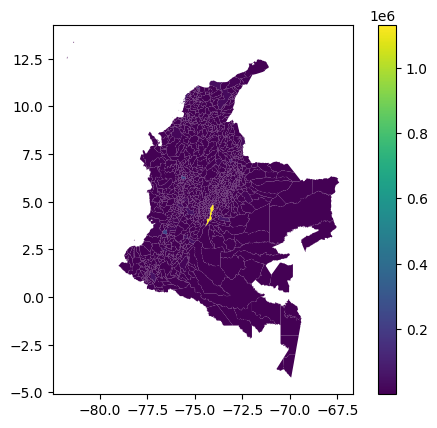

In [14]:
datos.plot(column ="sum",legend= True)

In [15]:
!pip3 install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 936.2 kB/s eta 0:00:00


<Axes: >

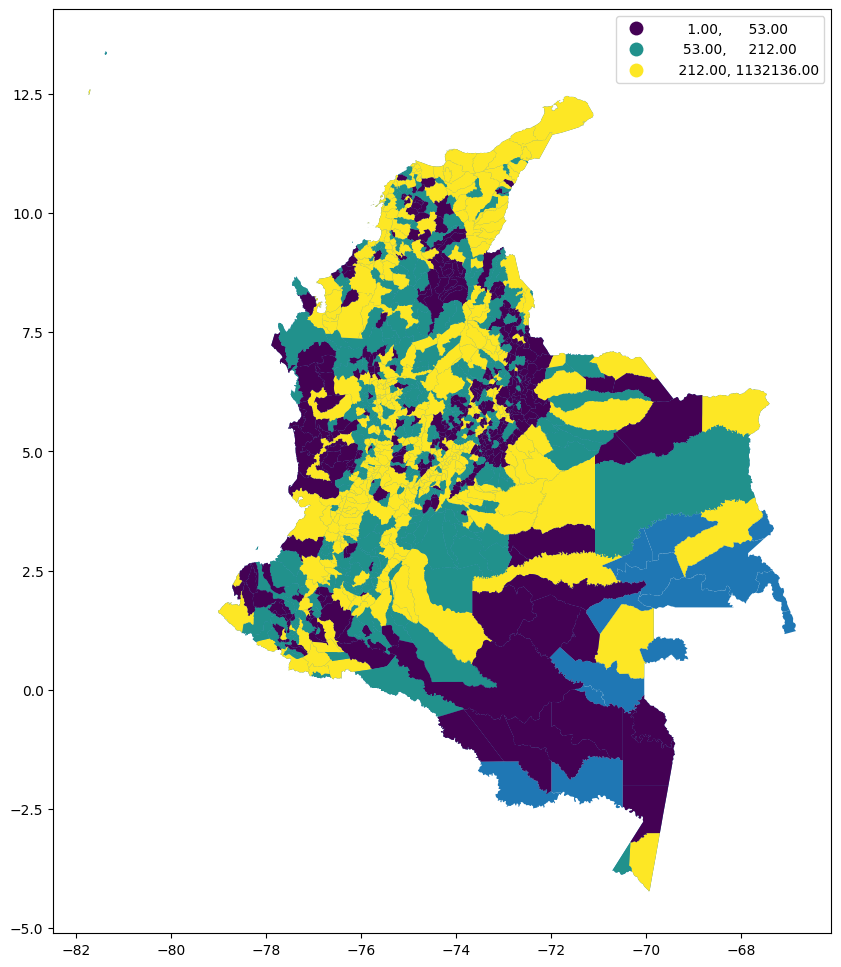

In [16]:
axis = municipios_mundial.plot(figsize = (12,12))
datos.plot(column ="sum",
                    scheme = "QUANTILES",
                    k = 3, ax = axis,
                    legend= True)